In [4]:
from btcgame import Game, Predictor

In [5]:
import pandas as pd
import numpy as np
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume(Currency)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[:10]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

2020-06-01.csv
2020-06-02.csv
2020-06-03.csv
2020-06-04.csv
2020-06-05.csv
2020-06-06.csv
2020-06-07.csv
2020-06-08.csv
2020-06-09.csv
2020-06-10.csv


In [10]:
from random import randint

class MyPredictor(Predictor):
    
    def predict(self, data):
        
        return(randint(-1, 2), 0.2)

In [11]:
game = Game(pd.DataFrame(data['WeightedPrice']), MyPredictor(), cash=20000)

In [21]:
game.play()

,Price,Action,Trade,Cash($),Holding(BTC),Capital($),Capped
0,9689.781286,2.0,0.2,16124.087486,1.400000,29689.781286,0
1,9674.250492,2.0,0.2,12254.387289,1.800000,29668.038174,0
2,9666.409297,2.0,0.2,8387.823570,2.200000,29653.924023,0
3,9669.128689,0.0,0.2,8387.823570,2.200000,29659.906685,0
4,9675.120921,2.0,0.2,4517.775202,2.600000,29673.089597,0
...,...,...,...,...,...,...,...
8665,9792.171011,0.0,0.2,0.000000,3.062403,29987.569303,0
8666,9778.161693,2.0,0.2,0.000000,3.062403,29944.667132,3911.264677225237$
8667,9770.745854,-1.0,0.2,1954.149171,2.862403,29921.956848,0
8668,9772.351493,0.0,0.2,1954.149171,2.862403,29926.552832,0


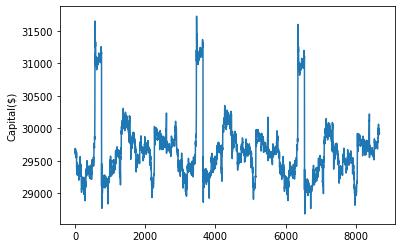

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=range(len(game.history)), y=game.history['Capital($)'])

In [16]:
len(game.history)

2890